In [45]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings

In [2]:
CURRENT_DIR = os.getcwd()
X_DIR = CURRENT_DIR + "\\data\\data_X.csv"
Y_DIR = CURRENT_DIR + "\\data\\data_Y.csv"

df_X = pd.read_csv(X_DIR)
df_Y = pd.read_csv(Y_DIR)

# Combine X and Y into a single DataFrame
combined_df = pd.concat([df_X, df_Y], axis=1)

combined_df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,-0.356023,0.780845,0.176105,3.517053,0.866027,2.310225,0,1,0,4,4,B,67.197250
1,-0.746808,-0.717318,-0.064209,0.119695,1.559913,0.865377,1,0,0,1,1,A,22.059926
2,-0.955821,0.454549,0.048775,1.343889,3.394067,0.535308,1,1,1,3,2,A,57.805471
3,0.089870,-0.087253,0.002765,0.824119,3.430068,3.628374,1,0,0,6,1,A,78.334217
4,-0.211063,-0.697655,-0.278250,3.579999,2.936863,2.966971,0,0,0,6,1,A,73.690271


In [3]:
# Check for null values in the combined DataFrame
null_values = combined_df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display the count of null values in each column
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
Y      0
dtype: int64


In [4]:
# Print data types of each column
column_types = combined_df.dtypes

# Display the data types
print("Data Types of Each Column:")
print(column_types)

Data Types of Each Column:
X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7       int64
X8       int64
X9       int64
X10      int64
X11      int64
X12     object
Y      float64
dtype: object


In [5]:
combined_df["X12"].value_counts()

X12
A    2039
B    1169
C     792
Name: count, dtype: int64

In [6]:
combined_df['X12'] = combined_df['X12'].map({'A': 1, 'B': 2, 'C': 3})

combined_df["X12"].value_counts()

X12
1    2039
2    1169
3     792
Name: count, dtype: int64

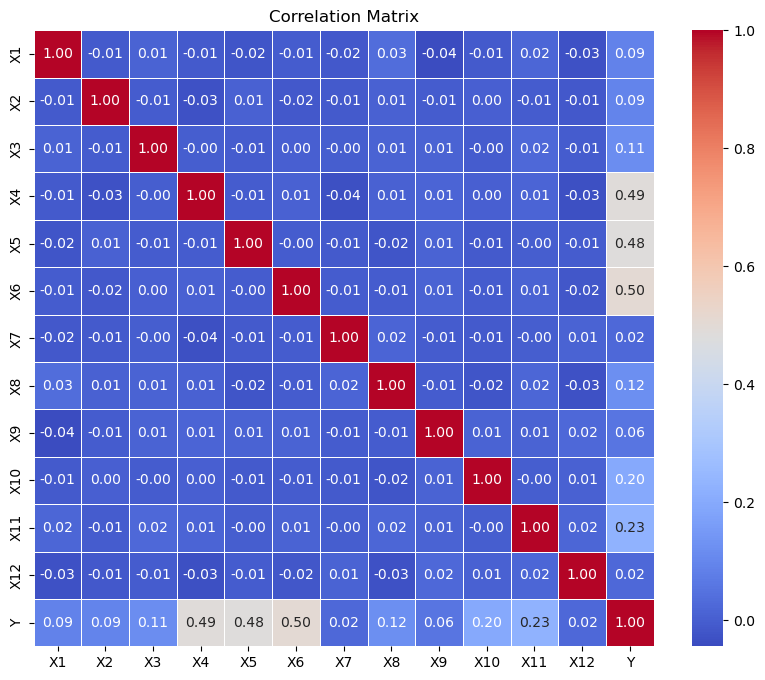

In [7]:
# Assuming 'combined_df' is your DataFrame
correlation_matrix = combined_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

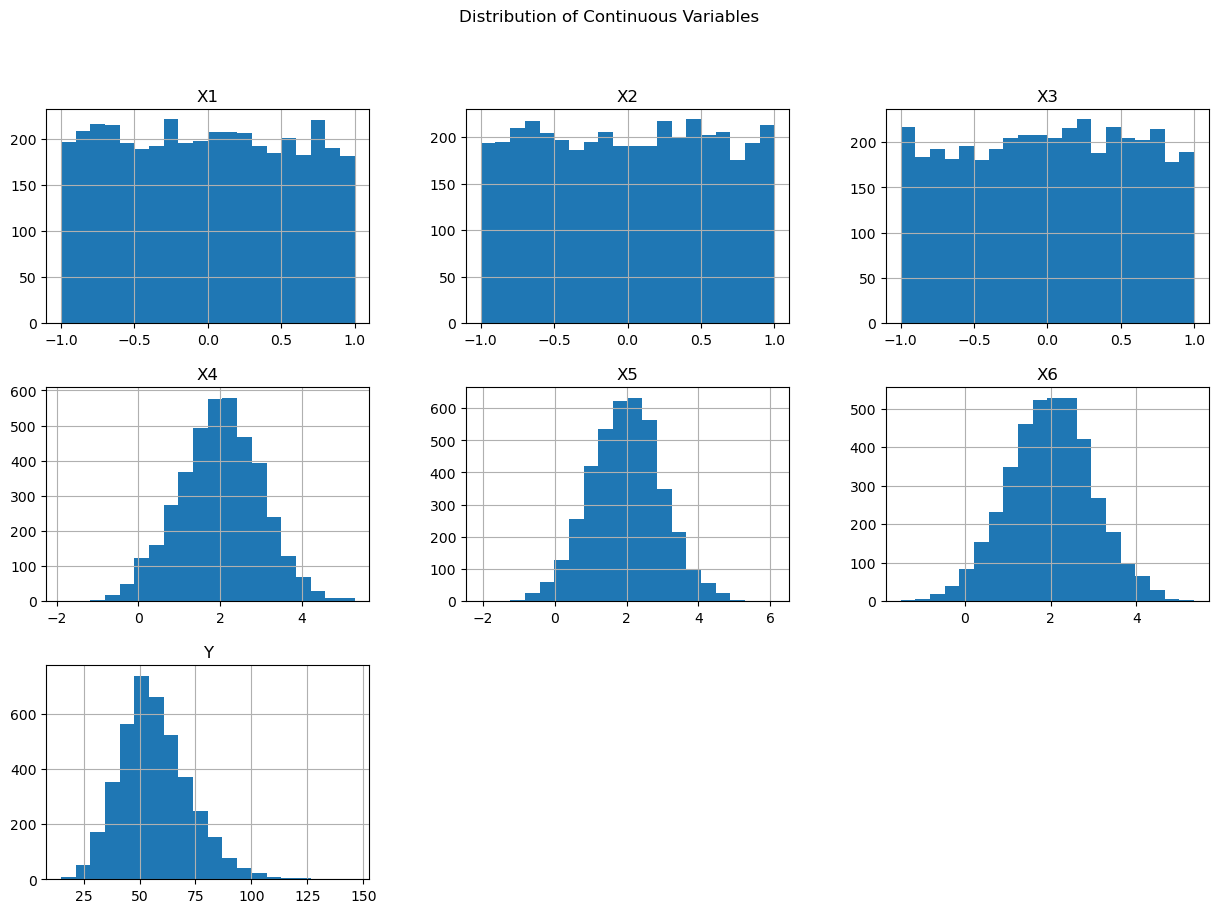

Summary Statistics for Continuous Variables:
                X1           X2           X3           X4           X5  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.012787    -0.000167     0.006065     1.995974     1.985906   
std       0.575202     0.578109     0.571383     1.000496     1.006474   
min      -0.999141    -0.999988    -0.999380    -1.893641    -2.063282   
25%      -0.517535    -0.508182    -0.477901     1.338099     1.318527   
50%      -0.016183     0.004561     0.017497     2.018515     1.990532   
75%       0.485797     0.493461     0.494006     2.689943     2.655297   
max       0.999257     0.999898     0.999711     5.294738     6.122285   

                X6            Y  
count  4000.000000  4000.000000  
mean      1.995889    56.943101  
std       0.998223    15.671238  
min      -1.504249    14.913546  
25%       1.330369    46.080276  
50%       2.000794    55.257376  
75%       2.658238    66.358181  
max       5.3488

In [33]:
continuous_vars = combined_df.select_dtypes(include='float64')
summary_stats_continuous = continuous_vars.describe()

continuous_vars.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Continuous Variables')
plt.show()

print("Summary Statistics for Continuous Variables:")
print(summary_stats_continuous)


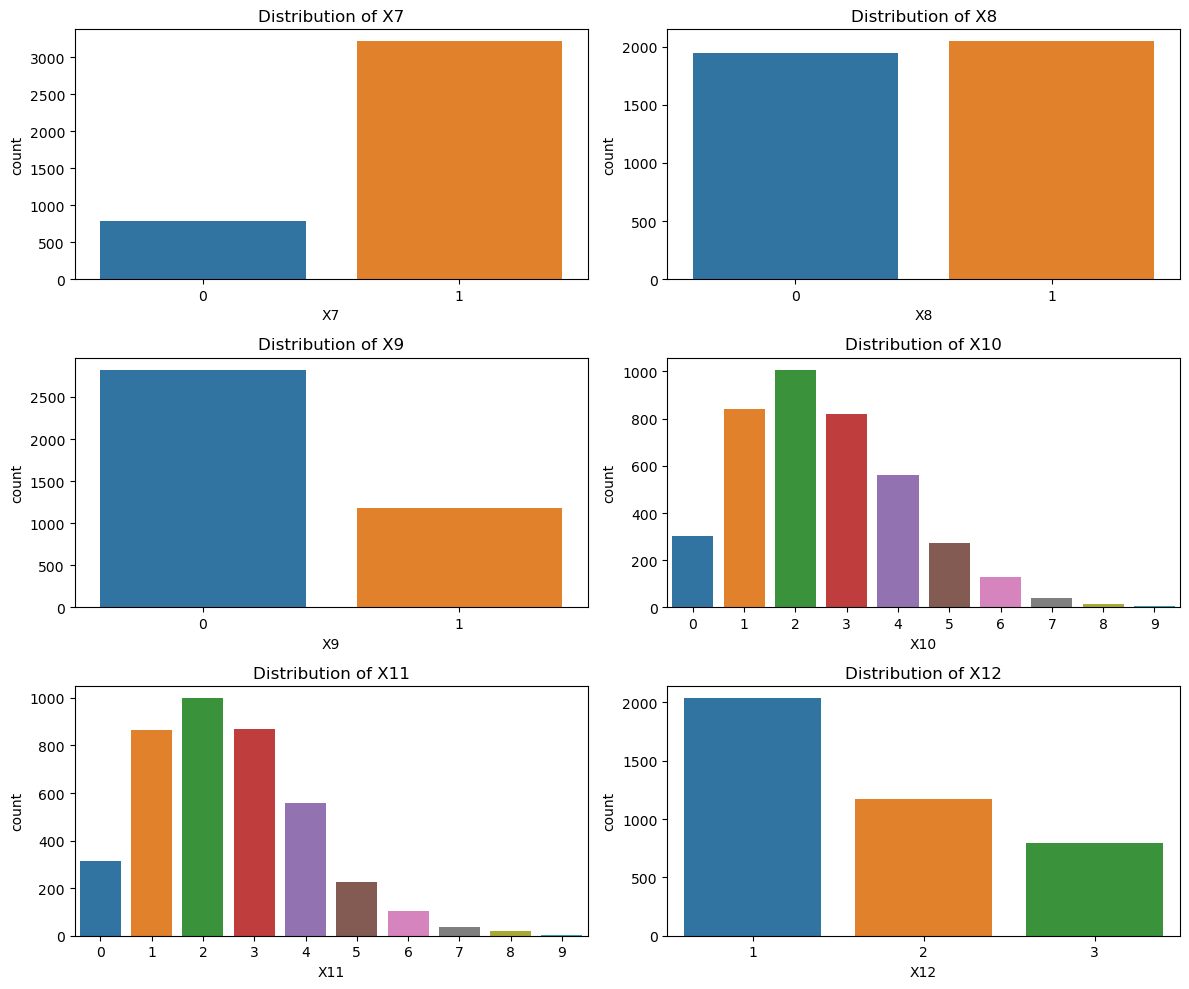

Summary Statistics for Categorical Variables:
                X7           X8           X9          X10          X11  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.803750     0.512250     0.293750     2.544750     2.475750   
std       0.397209     0.499912     0.455536     1.610791     1.562217   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     1.000000     1.000000   
50%       1.000000     1.000000     0.000000     2.000000     2.000000   
75%       1.000000     1.000000     1.000000     4.000000     3.000000   
max       1.000000     1.000000     1.000000     9.000000     9.000000   

               X12  
count  4000.000000  
mean      1.688250  
std       0.781482  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       3.000000  


In [22]:
warnings.simplefilter(action='ignore', category=FutureWarning)

categorical_vars = combined_df.select_dtypes(include='int64')
summary_stats_categorical = categorical_vars.describe()

# Set the number of rows and columns in the subplot grid
num_rows = len(categorical_vars.columns) // 2 + len(categorical_vars.columns) % 2
num_cols = 2

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the subplot grid for easier indexing
axes = axes.flatten()

# Loop through each categorical column and create a count plot in the corresponding subplot
for i, column in enumerate(categorical_vars.columns):
    sns.countplot(x=column, data=combined_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

print("Summary Statistics for Categorical Variables:")
print(summary_stats_categorical)

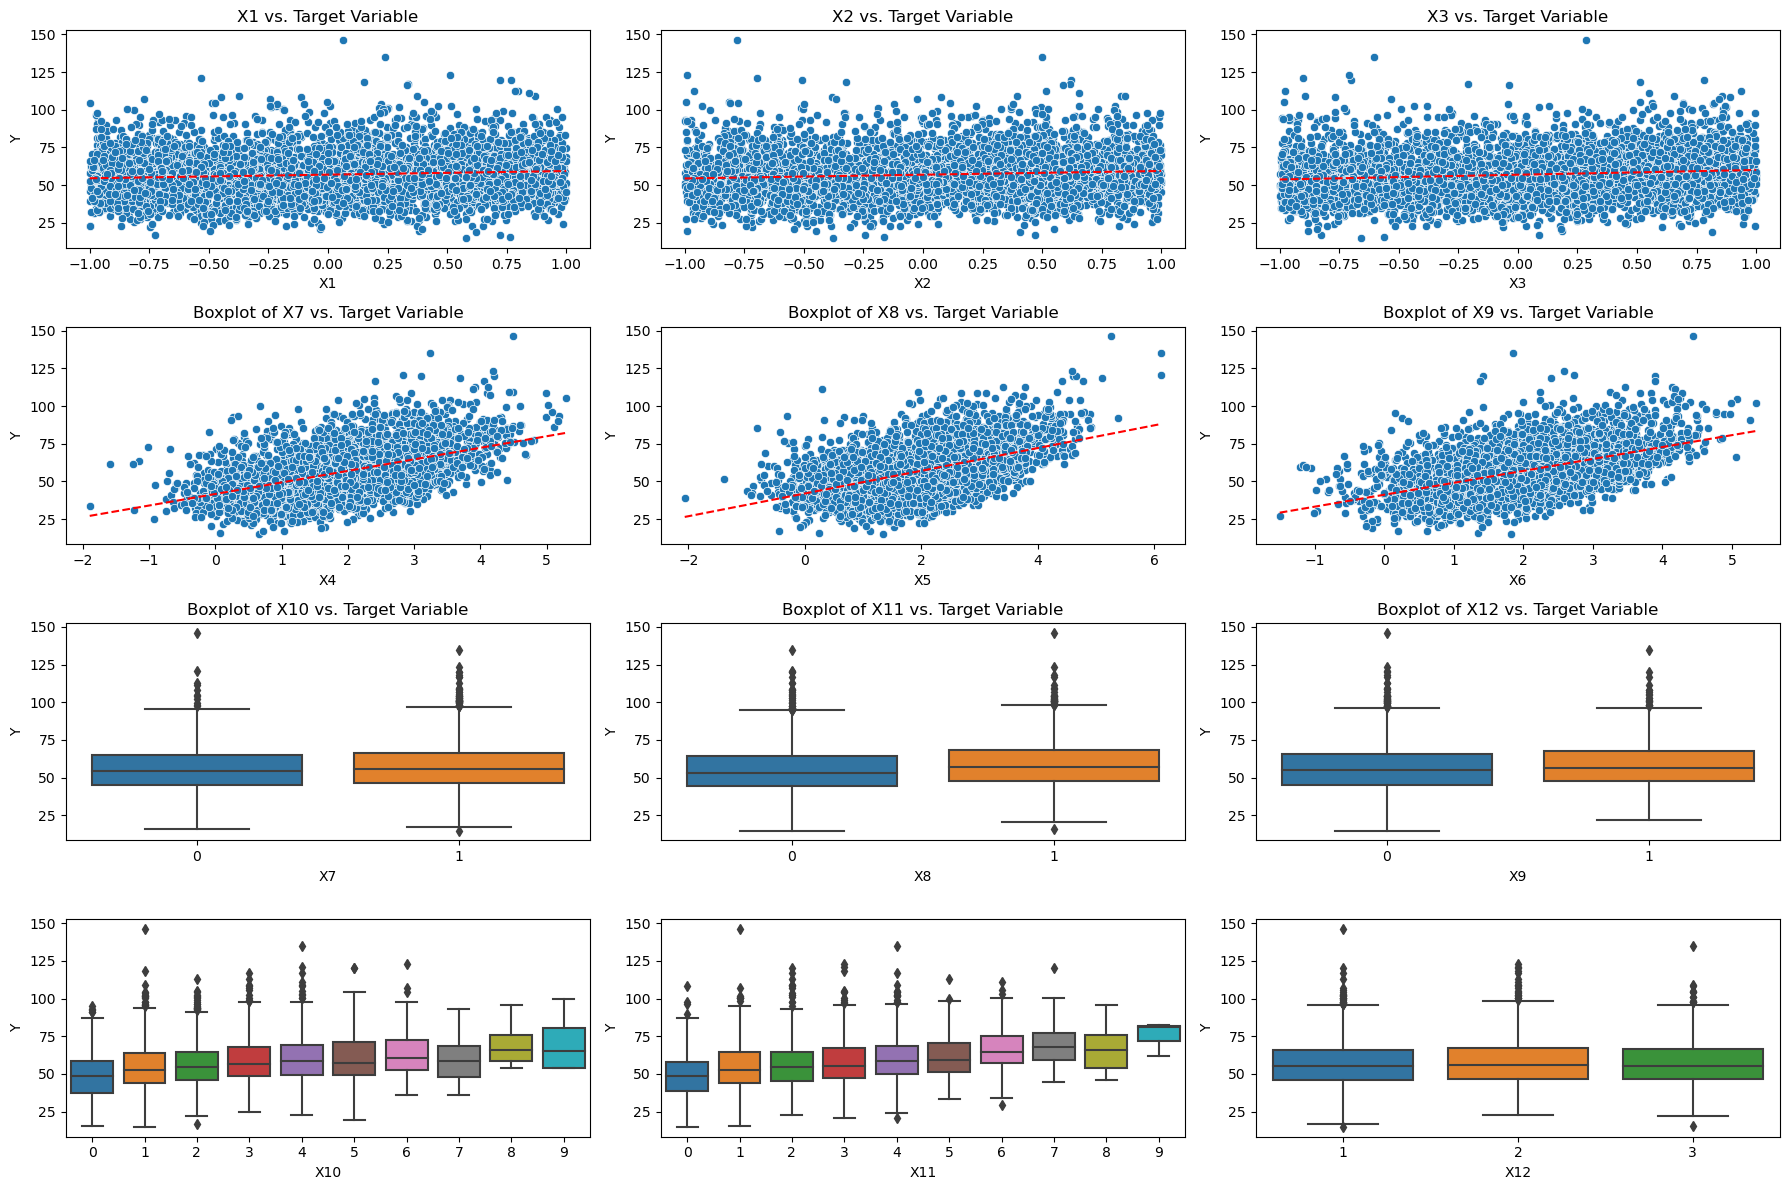

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Assuming 'combined_df' is your DataFrame
# If you have not already imported seaborn, you can do so with: import seaborn as sns

# Set the number of rows and columns in the subplot grid
num_rows = 4
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 12))

# Flatten the subplot grid for easier indexing
axes = axes.flatten()

# Loop through each feature (X1 to X6) and create a scatter plot against the target variable (Y)
for i, column in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    sns.scatterplot(x=column, y='Y', data=combined_df, ax=axes[i])
    axes[i].set_title(f'{column} vs. Target Variable')

    # Fit a linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(combined_df[column], combined_df['Y'])
    x_values = np.linspace(min(combined_df[column]), max(combined_df[column]), 100)
    y_values = intercept + slope * x_values
    axes[i].plot(x_values, y_values, color='red', linestyle='--')

# Loop through each categorical column and create a boxplot in the corresponding subplot
for i, column in enumerate(['X7', 'X8', 'X9', 'X10', 'X11', 'X12']):
    sns.boxplot(x=column, y='Y', data=combined_df, ax=axes[i + num_cols + 3])
    axes[i + num_cols].set_title(f'Boxplot of {column} vs. Target Variable')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
